<h1 align="center"> Análise Exploratória de Dados <br> Exame Nacional do Ensino Médio (ENEM) <br> Ano de 2019 </h1>

<p> Neste documento iremos explorar os dados do Enem para geramos alguns insights sobre a situação geral dos inscritos.<br>
 Iremos explorar os dados relacionando com as Notas em Ciências Humanas (CH), Ciências Naturais (CN), Línguas e Códigos (LC), Matemática (MT) e Redação</p>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math 
import numpy as np

In [36]:
from zipfile import ZipFile

In [37]:
file_name = "Enem_2019_SP.zip"
with ZipFile(file_name,"r") as zip:
    file = zip.open("Enem_2019_SP.csv")

<p>Os dados estão disponíveis no site do INEP http://portal.inep.gov.br/sinopses-estatisticas-do-enem. Para esta análise, iremos utilizar apenas os dados do Estado de São Paulo, pois o volume de dados é menor</p> 

In [38]:
dados_enem = pd.read_csv(file, sep=";", encoding="Latin 1")

In [39]:
file.close()

In [40]:
dados_enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [41]:
dados_enem.head(5)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001017053,2019,3546801,Santa Isabel,35,SP,22,M,1,3,...,A,A,A,C,A,A,D,A,B,B
1,190001019476,2019,3538204,Pinhalzinho,35,SP,19,M,1,3,...,A,A,A,B,A,A,C,A,B,A
2,190001019850,2019,3550308,São Paulo,35,SP,17,F,1,3,...,A,A,A,A,A,A,C,A,A,A
3,190001024874,2019,3548708,São Bernardo do Campo,35,SP,19,M,1,3,...,B,A,B,B,B,A,B,B,A,B
4,190001024931,2019,3549409,São Joaquim da Barra,35,SP,37,M,2,1,...,B,A,A,A,A,A,C,B,B,B


<h2 align="center">Data Cleaning</h2>
<p>Nesta etapa, iremos realizar a limpeza dos dados.</p>
<ul>
    <li>Remoção de colunas que não serão usadas nas análises.</li>
    <li>Remoção dos registros dos inscritos que não compareceram a nenhuma prova</li>
</ul>

In [42]:
columns = ['CO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'CO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 
          'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'SG_UF_ESC', 'CO_UF_ESC', 'CO_MUNICIPIO_PROVA', 'SG_UF_PROVA',
          'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH','TX_RESPOSTAS_LC',
          'TX_RESPOSTAS_MT', 'TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT']
dados_enem.drop(columns = columns, inplace=True) 

In [43]:
dados_enem[dados_enem.isnull().T.any()][['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO']]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,564.6,585.8,592.9,600.2,940.0
1,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,399.6,426.8,487.2,419.2,560.0
6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
813764,559.0,527.4,524.6,514.8,620.0
813765,NaN,NaN,NaN,NaN,NaN
813766,417.8,394.3,527.0,479.1,580.0
813769,402.8,561.8,535.0,401.1,740.0


In [44]:
dados_enem.query("TP_PRESENCA_CN == 0 and TP_PRESENCA_CH == 0 and TP_PRESENCA_LC == 0 and TP_PRESENCA_MT == 0")\
[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT',
  'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO']]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,NaN,NaN,NaN,NaN,NaN
6,0,0,0,0,NaN,NaN,NaN,NaN,NaN
7,0,0,0,0,NaN,NaN,NaN,NaN,NaN
9,0,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
813753,0,0,0,0,NaN,NaN,NaN,NaN,NaN
813758,0,0,0,0,NaN,NaN,NaN,NaN,NaN
813759,0,0,0,0,NaN,NaN,NaN,NaN,NaN
813765,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [45]:
dados_enem.drop(dados_enem.query("TP_PRESENCA_CN == 0 and TP_PRESENCA_CH == 0 and TP_PRESENCA_LC == 0 and TP_PRESENCA_MT == 0").index, inplace=True)

<h2 align="center">Feature Enginnering</h2>
<p>A etapa de Feature Engineering consiste em criar variáveis nominais para facilitar a visualização dos dados nos gráficos.</p>
<ul>
    <li>Cor/Raça</li>
    <li>Tipo de Escola</li>
    <li>Estado Civil</li>
    <li>Média simples das Notas (usada em vestibulares, SiSU, ProUni e FIES) </li>
</ul>

In [46]:
corraca = {
0: "Não declarado",
1: "Branca",
2: "Preta",
3: "Parda",
4: "Amarela",
5: "Indígena "    
}
#corraca[2]
dados_enem["NO_COR_RACA"] = [corraca[i] for i in dados_enem.TP_COR_RACA]

In [47]:
dados_enem[["NO_COR_RACA", "TP_COR_RACA"]].head()

,NO_COR_RACA,TP_COR_RACA
0,Parda,3
2,Parda,3
3,Parda,3
5,Parda,3
8,Branca,1


In [48]:
tipo_escola = {
1 : "Não Respondeu",
2 : "Pública",
3 : "Privada",
4 : "Exterior"  
}
#corraca[2]
dados_enem["NO_TP_ESCOLA"] = [tipo_escola[i] for i in dados_enem.TP_ESCOLA]

In [49]:
estado_civil = {
0: "Não informado",
1: "Solteiro(a)",
2: "Casado(a)/Mora com companheiro(a)",
3: "Divorciado(a)/Desquitado(a)/Separado(a)",
4: "Viúvo(a)"
}

dados_enem["NO_ESTADO_CIVIL"] = [estado_civil[i] for i in dados_enem.TP_ESTADO_CIVIL]

<p>Como cada universidade utiliza um cálculo diferente para a média das notas, ficou definido que utilizaremos a média simples, apenas para fins de análise</p>

In [57]:
dados_enem["NU_NOTA_MEDIA"] = (
    dados_enem.NU_NOTA_CN.fillna(0) + 
    dados_enem.NU_NOTA_CH.fillna(0) + 
    dados_enem.NU_NOTA_LC.fillna(0) + 
    dados_enem.NU_NOTA_MT.fillna(0) + 
    dados_enem.NU_NOTA_REDACAO.fillna(0))/5

In [60]:
dados_enem[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","NU_NOTA_MEDIA"]].sample(10)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_MEDIA
281229,505.0,609.7,581.1,620.1,900.0,643.18
107292,406.0,515.8,554.9,438.2,560.0,494.98
75916,559.5,575.6,561.6,670.1,840.0,641.36
159356,665.4,679.2,618.1,760.4,980.0,740.62
460676,NaN,547.5,568.8,NaN,520.0,327.26
684650,468.7,543.5,592.7,657.5,600.0,572.48
233411,374.6,496.3,508.9,481.6,480.0,468.28
515374,600.9,609.7,602.3,666.1,660.0,627.80
69922,411.0,467.9,516.0,464.9,580.0,487.96
399205,539.7,601.2,564.9,601.7,700.0,601.50


In [66]:
dados_enem[dados_enem.NU_NOTA_MEDIA == 0][['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT',"NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","NU_NOTA_MEDIA"]]

#retirar os NaN

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_MEDIA
1426,0,1,1,0,NaN,0.0,0.0,NaN,0.0,0.0
3917,0,2,2,0,NaN,NaN,NaN,NaN,NaN,0.0
6657,0,2,2,0,NaN,NaN,NaN,NaN,NaN,0.0
6850,0,2,2,0,NaN,NaN,NaN,NaN,NaN,0.0
7772,0,2,2,0,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
811366,0,2,2,0,NaN,NaN,NaN,NaN,NaN,0.0
811730,0,2,2,0,NaN,NaN,NaN,NaN,NaN,0.0
811734,0,1,1,0,NaN,0.0,0.0,NaN,0.0,0.0
812773,0,1,1,0,NaN,0.0,0.0,NaN,0.0,0.0


<h2 align="center">Análise Estatística de Notas</h2>

In [61]:
questionario_notas = dados_enem[["NU_INSCRICAO","TP_COR_RACA","NO_COR_RACA","TP_ESCOLA", "NO_TP_ESCOLA","Q001","Q002","Q003","Q004","Q005","Q006","Q024","Q025",\
                                 "NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","NU_NOTA_MEDIA"]]\
                                .sort_values(["TP_ESCOLA","Q001","Q002","Q003","Q004","Q005","Q006","Q024","Q025"])

In [62]:
questionario_notas[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","NU_NOTA_MEDIA"]].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_MEDIA
count,582605.000000,620645.000000,620645.000000,582605.000000,620645.000000,622707.000000
mean,496.996064,527.785569,539.900178,551.559675,587.486147,526.144070
std,77.814229,79.978883,58.982506,114.076431,174.421490,104.323246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,435.900000,475.600000,508.000000,456.600000,500.000000,472.400000
50%,495.600000,533.900000,546.100000,539.700000,600.000000,531.280000
75%,554.500000,582.800000,579.500000,635.000000,680.000000,594.160000
max,860.900000,822.700000,801.700000,985.500000,1000.000000,835.900000


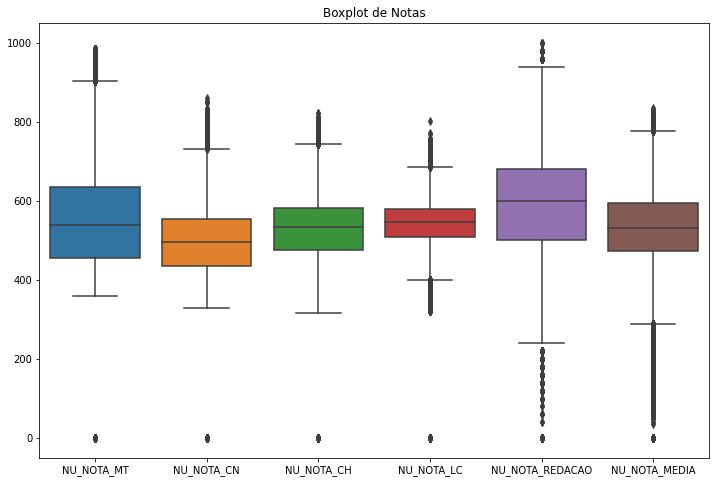

In [67]:
notas = questionario_notas[["NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO","NU_NOTA_MEDIA"]]

plt.figure(figsize=(12,8))
sns.boxplot(data=notas)
plt.title("Boxplot de Notas")
plt.show()

<h3 align="center"> Análise de Notas de acordo com a Renda Familiar </h3>

<p> Nas tabelas abaixo, temos as estatísticas de notas de cada prova de acordo com a Renda Familiar Mensal.<br>
A Renda Mensal está categorisada de A a Q, onde A é a renda mais baixa e Q a renda mais alta</p>
<p> Nesta análise, podemos observar que, de acordo com os dados, a renda familiar mensal influencia na média das notas.</p>

In [ ]:
questionario_notas.groupby("Q006")[["NU_NOTA_CN","NU_NOTA_CH"]].describe()

In [ ]:
questionario_notas.groupby("Q006")[["NU_NOTA_LC","NU_NOTA_MT"]].describe()

In [ ]:
questionario_notas.groupby("Q006")[["NU_NOTA_REDACAO"]].describe()

<h3 align="center"> Media de notas por renda </h3>

In [ ]:
questionario_notas.groupby("Q006")[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]].mean().plot(figsize=(10,5))

In [ ]:
sns.set()
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 10), sharey=True)
fig.suptitle("Distribuição de Notas de acordo com a Renda Mensal Familiar por prova ", fontsize=24)

x = "Q006"
orderby = sorted(questionario_notas["Q006"].unique())
palette = "gist_ncar_r"
sns.boxplot(ax=axes[0,0], x=x, y="NU_NOTA_CN", data=questionario_notas, order=orderby, palette=palette)
axes[0,0].set_title("Ciências Naturais")
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("")

sns.boxplot(ax=axes[0,1], x=x, y="NU_NOTA_CH", data=questionario_notas, order=orderby, palette=palette)
axes[0,1].set_title("Ciências Humanas")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")

sns.boxplot(ax=axes[1,0], x=x, y="NU_NOTA_LC", data=questionario_notas, order=orderby, palette=palette)
axes[1,0].set_title("Línguas e Códigos")
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("")

sns.boxplot(ax=axes[1,1], x=x, y="NU_NOTA_MT", data=questionario_notas, order=orderby, palette=palette)
axes[1,1].set_title("Matemática")
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

fig.suptitle("Distribuição de Notas de acordo com a Renda Mensal Familiar na prova de Redação ", fontsize=24)
sns.boxplot(x=x, y="NU_NOTA_REDACAO", data=questionario_notas, order=orderby, palette=palette)
ax.set_title("Redação")
ax.set_xlabel("")
ax.set_xlabel("")
plt.show()

<p>De acordo com os gráficos acima, podemos ver que, conforme a Renda Familiar aumenta, a nota dos inscritos aumenta.
Nas próximas análises, vamos verificar a correlação entre o tipo de escola e as notas dos inscritos. Vamos analisar também a situação dos outliers. Por que, um aluno de escola particular com uma renda mensal alta, teve notas abaixo da média? Qual a situação socio-economica dos inscritos de baixa renda com pontuação alta?
Essas e outras perguntas serão respondidas nas analises a seguir
</p>

<h3 align="center">Análise de notas por tipo de escola</h3>

In [ ]:
media_por_tipo_escola = questionario_notas.groupby(["NO_TP_ESCOLA","TP_ESCOLA"])[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]].mean().reset_index()
media_por_tipo_escola = media_por_tipo_escola.astype({"TP_ESCOLA":"category"})
media_por_tipo_escola

In [ ]:
chart = sns.catplot(data=media_por_tipo_escola, col="NO_TP_ESCOLA", kind="bar")
plt.subplots_adjust(top=0.8)
plt.suptitle("Média das Notas por Tipo de Escola")
chart.set_xticklabels(rotation=45)

plt.show()

<p>Escolas tipo 2 e 3 são, respectivamente, Pública e Privada.
Por este gráfico podemos ver uma diferença significante nas notas dos alunos que estudam em escola publica e os de escola privada
</p>

In [ ]:
sns.set()
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 10), sharey=True, sharex=True)
fig.suptitle("Distribuição de Notas de acordo com o Tipo de Escola por prova ", fontsize=24)

x = "NO_TP_ESCOLA"
palette = "gist_ncar_r"
sns.boxplot(ax=axes[0,0], x=x, y="NU_NOTA_CN", data=questionario_notas.query("TP_ESCOLA != 1"), palette=palette)
axes[0,0].set_title("Ciências Naturais")
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("")

sns.boxplot(ax=axes[0,1], x=x, y="NU_NOTA_CH", data=questionario_notas.query("TP_ESCOLA != 1"), palette=palette)
axes[0,1].set_title("Ciências Humanas")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")

sns.boxplot(ax=axes[1,0], x=x, y="NU_NOTA_LC", data=questionario_notas.query("TP_ESCOLA != 1"), palette=palette)
axes[1,0].set_title("Línguas e Códigos")
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("")

sns.boxplot(ax=axes[1,1], x=x, y="NU_NOTA_MT", data=questionario_notas.query("TP_ESCOLA != 1"), palette=palette)
axes[1,1].set_title("Matemática")
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
fig.suptitle("Distribuição de Notas de Redação de acordo com o Tipo de Escola", fontsize=24)
sns.boxplot( x=x, y="NU_NOTA_REDACAO", data=questionario_notas.query("TP_ESCOLA != 1"), palette=palette)
ax.set_title("Redação")
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()

In [ ]:
questionario_notas.groupby("TP_ESCOLA")[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]].count()

<h3 align="center">Frequência das Notas por Tipo de Escola</h3> 

In [ ]:
fig, axs = plt.subplots(2,4,figsize=(20,10))

sns.histplot(ax=axs[0,0],x="NU_NOTA_CN", data=questionario_notas.query("TP_ESCOLA == 2"),kde=True)
axs[0,0].set_xlabel("")
axs[0,0].set_ylabel("")
axs[0,0].set_title("Ciências Naturais(Escola Pública)")
sns.histplot(ax=axs[0,1],x="NU_NOTA_CN", data=questionario_notas.query("TP_ESCOLA == 3"),kde=True)
axs[0,1].set_xlabel("")
axs[0,1].set_ylabel("")
axs[0,1].set_title("Ciências Naturais(Escola Privada)")

sns.histplot(ax=axs[0,2],x="NU_NOTA_CH", data=questionario_notas.query("TP_ESCOLA == 2"),kde=True)
axs[0,2].set_xlabel("")
axs[0,2].set_ylabel("")
axs[0,2].set_title("Ciências Humanas (Escola Pública)")

sns.histplot(ax=axs[0,3],x="NU_NOTA_CH", data=questionario_notas.query("TP_ESCOLA == 3"),kde=True)
axs[0,3].set_xlabel("")
axs[0,3].set_ylabel("")
axs[0,3].set_title("Ciências Humanas (Escola Privada)")

sns.histplot(ax=axs[1,0],x="NU_NOTA_LC", data=questionario_notas.query("TP_ESCOLA == 2"),kde=True)
axs[1,0].set_xlabel("")
axs[1,0].set_ylabel("")
axs[1,0].set_title("Línguas e Códigos (Escola Pública)")

sns.histplot(ax=axs[1,1],x="NU_NOTA_LC", data=questionario_notas.query("TP_ESCOLA == 3"),kde=True)
axs[1,1].set_xlabel("")
axs[1,1].set_ylabel("")
axs[1,1].set_title("Línguas e Códigos (Escola Privada)")

sns.histplot(ax=axs[1,2],x="NU_NOTA_MT", data=questionario_notas.query("TP_ESCOLA == 2"),kde=True)
axs[1,2].set_xlabel("")
axs[1,2].set_ylabel("")
axs[1,2].set_title("Matemática (Escola Pública)")

sns.histplot(ax=axs[1,3],x="NU_NOTA_MT", data=questionario_notas.query("TP_ESCOLA == 3"),kde=True)
axs[1,3].set_xlabel("")
axs[1,3].set_ylabel("")
axs[1,3].set_title("Matemática (Escola Privada)")

plt.show()

<h1 align="center"> Análise dos outliers </h1>

<p>Nesta análise, vamos encontrar os outliers geral, independente do grupo de renda a que pertencem. Em seguida, vamos fazer uma análise por renda e cor/raça</p>

## Outliers
### Limite Inferior = Primeiro Quartil – 1,5 * (Terceiro Quartil – Primeiro Quartil)
### Limite Superior = Terceiro Quartil + 1,5 * (Terceiro Quartil – Primeiro Quartil)

In [ ]:
Q1 = notas.quantile([0.25]).reset_index()
Q3 = notas.quantile([0.75]).reset_index()

In [ ]:
print(Q3)
print(Q1)
print(Q3-Q1)

In [ ]:
limite_inferior = Q1 - 1.5 * (Q3 - Q1)
limite_superior = Q3 + 1.5 * (Q3 - Q1)

In [ ]:
limite_inferior.drop(columns="index", inplace=True)
limite_superior.drop(columns="index", inplace=True)

In [ ]:
print(limite_inferior)
print(limite_superior)

In [ ]:
questionario_notas["MT_LI"] = questionario_notas["NU_NOTA_MT"] <= 189
questionario_notas["CN_LI"] = questionario_notas["NU_NOTA_CN"] <= 258
questionario_notas["CH_LI"] = questionario_notas["NU_NOTA_CH"] <= 314.8
questionario_notas["LC_LI"] = questionario_notas["NU_NOTA_LC"] <= 400.75
questionario_notas["REDACAO_LI"] = questionario_notas["NU_NOTA_REDACAO"] <= 230.0

questionario_notas["MT_LS"] = questionario_notas["NU_NOTA_MT"] >=902.6
questionario_notas["CN_LS"] = questionario_notas["NU_NOTA_CN"] >=732.4
questionario_notas["CH_LS"] = questionario_notas["NU_NOTA_CH"] >=743.6
questionario_notas["LC_LS"] = questionario_notas["NU_NOTA_LC"] >=686.75
questionario_notas["REDACAO_LS"] = questionario_notas["NU_NOTA_REDACAO"] >= 950.0



In [ ]:
questionario_notas.columns.values

In [ ]:
notas_li = questionario_notas.query("MT_LI == True or CN_LI == True or CH_LI == True or LC_LI == True or REDACAO_LI == True")\
[["NU_INSCRICAO","NO_COR_RACA", "Q006", "NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO",
 "MT_LI", "CN_LI", "CH_LI", "LC_LI", "REDACAO_LI"]]

In [ ]:
notas_li.head(5)

In [ ]:
print(notas_li[notas_li.MT_LI == True]["NU_NOTA_MT"].sum())
print(notas_li[notas_li.CN_LI == True]["NU_NOTA_CN"].sum())
print(notas_li[notas_li.CH_LI == True]["NU_NOTA_CH"].sum())
print(notas_li[notas_li.LC_LI == True]["NU_NOTA_LC"].sum())
print(notas_li[notas_li.REDACAO_LI == True]["NU_NOTA_REDACAO"].sum())

<p>As notas de Matemática, Ciências da Natureza e Ciências Humanas que estão abaixo do limite inferior, estão zeradas.</p>

<p>Vamos analisar a cor/raça e a relação com a renda familiar e as notas abaixo do limite inferior(outliers)</p>

In [ ]:
total_inscritos_cor_raca = dados_enem.groupby("NO_COR_RACA").count()["NU_INSCRICAO"].reset_index()
total_inscritos_cor_raca["Porcentagem_Geral"] = total_inscritos_cor_raca.NU_INSCRICAO / dados_enem.NU_INSCRICAO.count() *100

In [ ]:
total_inscritos_cor_raca.sort_values(by="Porcentagem_Geral", ascending=False)

In [ ]:
quantidade_cor_raca_renda_LC = notas_li[notas_li.LC_LI == True]\
.groupby(["NO_COR_RACA", "Q006"])["NU_INSCRICAO"]\
.count().reset_index()

quantidade_cor_raca_renda_LC.rename(columns={"NU_INSCRICAO": "Quantidade"
                                             , "NO_COR_RACA": "Cor/Raça"
                                             , "Q006": "Renda Mensal"}, inplace=True)

quantidade_cor_raca_renda_Redacao = notas_li[notas_li.REDACAO_LI == True]\
.groupby(["NO_COR_RACA", "Q006"])["NU_INSCRICAO"]\
.count().reset_index()

quantidade_cor_raca_renda_Redacao.rename(columns={"NU_INSCRICAO": "Quantidade"
                                                  , "NO_COR_RACA": "Cor/Raça"
                                                  , "Q006": "Renda Mensal"}, inplace=True)

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,15))
sns.scatterplot(ax=ax[0],data=quantidade_cor_raca_renda_LC, x="Renda Mensal", y="Quantidade", hue="Cor/Raça"
            , size="Quantidade", sizes=(20,500),palette="brg")
sns.scatterplot(ax=ax[1],data=quantidade_cor_raca_renda_Redacao, x="Renda Mensal", y="Quantidade", hue="Cor/Raça"
            , size="Quantidade", sizes=(20,500), palette="brg")

ax[0].set_title("Quantidade de Alunos por Cor/Raça e Renda Familiar com notas em Línguas e Códigos outliers")
ax[1].set_title("Quantidade de Alunos por Cor/Raça e Renda Familiar com notas em Redação outliers")
#ax[0].set_xlabel("Renda Familiar")
#ax[1].set_xlabel("Renda Familiar")
ax[0].set_ylabel("Número de Inscritos")
ax[1].set_ylabel("Número de Inscritos")

plt.show()

In [ ]:
notas_ls = questionario_notas.query("MT_LS == True or CN_LS == True or CH_LS == True or LC_LS == True or REDACAO_LS == True")\
[["NU_INSCRICAO","NO_COR_RACA", "Q006", "NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO",
 "MT_LS", "CN_LS", "CH_LS", "LC_LS", "REDACAO_LS"]]

notas_ls.head()

In [ ]:
print(notas_ls[notas_ls.MT_LS == True]["NU_NOTA_MT"].sum())
print(notas_ls[notas_ls.CN_LS == True]["NU_NOTA_CN"].sum())
print(notas_ls[notas_ls.CH_LS == True]["NU_NOTA_CH"].sum())
print(notas_ls[notas_ls.LC_LS == True]["NU_NOTA_LC"].sum())
print(notas_ls[notas_ls.REDACAO_LS == True]["NU_NOTA_REDACAO"].sum())

In [ ]:
quantidade_cor_raca_renda_MT = notas_ls[notas_ls.MT_LS == True]\
.groupby(["NO_COR_RACA", "Q006"])["NU_INSCRICAO"]\
.count().reset_index()

quantidade_cor_raca_renda_MT.rename(columns={"NU_INSCRICAO": "Quantidade"
                                             , "NO_COR_RACA": "Cor/Raça"
                                             , "Q006": "Renda Mensal"}, inplace=True)

quantidade_cor_raca_renda_CN = notas_ls[notas_ls.CN_LS == True]\
.groupby(["NO_COR_RACA", "Q006"])["NU_INSCRICAO"]\
.count().reset_index()

quantidade_cor_raca_renda_CN.rename(columns={"NU_INSCRICAO": "Quantidade"
                                                  , "NO_COR_RACA": "Cor/Raça"
                                                  , "Q006": "Renda Mensal"}, inplace=True)

quantidade_cor_raca_renda_CH = notas_ls[notas_ls.CH_LS == True]\
.groupby(["NO_COR_RACA", "Q006"])["NU_INSCRICAO"]\
.count().reset_index()

quantidade_cor_raca_renda_CH.rename(columns={"NU_INSCRICAO": "Quantidade"
                                             , "NO_COR_RACA": "Cor/Raça"
                                             , "Q006": "Renda Mensal"}, inplace=True)

quantidade_cor_raca_renda_LC = notas_ls[notas_ls.LC_LS == True]\
.groupby(["NO_COR_RACA", "Q006"])["NU_INSCRICAO"]\
.count().reset_index()

quantidade_cor_raca_renda_LC.rename(columns={"NU_INSCRICAO": "Quantidade"
                                             , "NO_COR_RACA": "Cor/Raça"
                                             , "Q006": "Renda Mensal"}, inplace=True)

quantidade_cor_raca_renda_Redacao = notas_ls[notas_ls.REDACAO_LS == True]\
.groupby(["NO_COR_RACA", "Q006"])["NU_INSCRICAO"]\
.count().reset_index()

quantidade_cor_raca_renda_Redacao.rename(columns={"NU_INSCRICAO": "Quantidade"
                                                  , "NO_COR_RACA": "Cor/Raça"
                                                  , "Q006": "Renda Mensal"}, inplace=True)

In [ ]:
quantidade_cor_raca_renda_MT.sort_values(by="Renda Mensal", inplace=True)
quantidade_cor_raca_renda_CN.sort_values(by="Renda Mensal", inplace=True)
quantidade_cor_raca_renda_CH.sort_values(by="Renda Mensal", inplace=True)
quantidade_cor_raca_renda_LC.sort_values(by="Renda Mensal", inplace=True)
quantidade_cor_raca_renda_Redacao.sort_values(by="Renda Mensal", inplace=True)

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(12,15))
sns.scatterplot(ax=ax[0],data=quantidade_cor_raca_renda_MT, x="Renda Mensal", y="Quantidade", hue="Cor/Raça"
            , size="Quantidade", sizes=(20,500),palette="brg")
ax[0].set_title("Quantidade de Alunos por Cor/Raça e Renda Familiar com notas em Matemática outliers")

sns.scatterplot(ax=ax[1],data=quantidade_cor_raca_renda_CN, x="Renda Mensal", y="Quantidade", hue="Cor/Raça"
            , size="Quantidade", sizes=(20,500), palette="brg")

ax[1].set_title("Quantidade de Alunos por Cor/Raça e Renda Familiar com notas em Ciências da Natureza outliers")
plt.show()

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(12,15))
sns.scatterplot(ax=ax[0],data=quantidade_cor_raca_renda_CH, x="Renda Mensal", y="Quantidade", hue="Cor/Raça"
            , size="Quantidade", sizes=(20,500),palette="brg")
ax[0].set_title("Quantidade de Alunos por Cor/Raça e Renda Familiar com notas em Ciências Humanas outliers")

sns.scatterplot(ax=ax[1],data=quantidade_cor_raca_renda_LC, x="Renda Mensal", y="Quantidade", hue="Cor/Raça"
            , size="Quantidade", sizes=(20,500), palette="brg")

ax[1].set_title("Quantidade de Alunos por Cor/Raça e Renda Familiar com notas em Línguas e Códigos outliers")
plt.show()


In [ ]:
plt.subplots(figsize=(15,8))

sns.scatterplot(data=quantidade_cor_raca_renda_Redacao, x="Renda Mensal", y="Quantidade", hue="Cor/Raça"
            , size="Quantidade", sizes=(20,500), palette="brg")
plt.show

In [ ]:
grau_instrucao_pai = dados_enem.groupby(["Q001"]).mean()[["NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]].reset_index()
grau_instrucao_pai = grau_instrucao_pai.melt(id_vars=["Q001"], value_vars=["NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"])

In [ ]:
grau_instrucao_mae = dados_enem.groupby(["Q002"]).mean()[["NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]].reset_index()
grau_instrucao_mae = grau_instrucao_mae.melt(id_vars=["Q002"], value_vars=["NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"])

In [ ]:
grau_instrucao_pai.rename(columns={"variable": "Disciplina", "value": "Notas", "Q001": "Grau de Instrução do Pai"}, inplace=True)
grau_instrucao_mae.rename(columns={"variable": "Disciplina", "value": "Notas", "Q002": "Grau de Instrução da Mãe"}, inplace=True)

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(15,12))
sns.barplot(ax=ax[0],data=grau_instrucao_pai,x="Grau de Instrução do Pai", y="Notas", hue="Disciplina")
sns.barplot(ax=ax[1],data=grau_instrucao_mae,x="Grau de Instrução da Mãe", y="Notas", hue="Disciplina")
#fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
print(grau_instrucao_pai.head())
print(grau_instrucao_mae.head())



#f.delaxes(ax= axes[1,2]) 

In [ ]:
heat = dados_enem.groupby(["Q001", "Q003"]).count()["NU_INSCRICAO"].reset_index()
heat

In [ ]:
heat = heat.pivot("Q001", "Q003", "NU_INSCRICAO")
heat

In [ ]:
sns.heatmap(data=heat, robust=True)